In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="darkgrid")
from matplotlib.pyplot import figure

In [2]:
temp_path = 'GlobalTempData.csv'
IO_path = 'IndustrialOutputData.csv'
temp_file = pd.read_csv(temp_path)
IO_file = pd.read_csv(IO_path)
temp_df = pd.DataFrame(temp_file)
IO_df = pd.DataFrame(IO_file)

In [3]:
temp_df

,dt,LandAverageTemperature,LandAverageTemperatureUncertainty,LandMaxTemperature,LandMaxTemperatureUncertainty,LandMinTemperature,LandMinTemperatureUncertainty,LandAndOceanAverageTemperature,LandAndOceanAverageTemperatureUncertainty
0,1750-01-01,3.034,3.574,NaN,NaN,NaN,NaN,NaN,NaN
1,1750-02-01,3.083,3.702,NaN,NaN,NaN,NaN,NaN,NaN
2,1750-03-01,5.626,3.076,NaN,NaN,NaN,NaN,NaN,NaN
3,1750-04-01,8.490,2.451,NaN,NaN,NaN,NaN,NaN,NaN
4,1750-05-01,11.573,2.072,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...
3187,2015-08-01,14.755,0.072,20.699,0.110,9.005,0.170,17.589,0.057
3188,2015-09-01,12.999,0.079,18.845,0.088,7.199,0.229,17.049,0.058
3189,2015-10-01,10.801,0.102,16.450,0.059,5.232,0.115,16.290,0.062
3190,2015-11-01,7.433,0.119,12.892,0.093,2.157,0.106,15.252,0.063


In [4]:
del temp_df['LandAverageTemperatureUncertainty']
del temp_df['LandMaxTemperature']
del temp_df['LandMaxTemperatureUncertainty']
del temp_df['LandMinTemperature']
del temp_df['LandMinTemperatureUncertainty']
del temp_df['LandAndOceanAverageTemperature']
del temp_df['LandAndOceanAverageTemperatureUncertainty']


In [5]:
new = temp_df['dt'].str.split("-", n = 1, expand = True)

In [6]:
new

,0,1
0,1750,01-01
1,1750,02-01
2,1750,03-01
3,1750,04-01
4,1750,05-01
...,...,...
3187,2015,08-01
3188,2015,09-01
3189,2015,10-01
3190,2015,11-01


In [7]:
new['Average Temperature'] = temp_df['LandAverageTemperature']

In [8]:
temperature = new.rename(columns={'0': 'Year', '1': 'Date'})

In [9]:
temperature

,0,1,Average Temperature
0,1750,01-01,3.034
1,1750,02-01,3.083
2,1750,03-01,5.626
3,1750,04-01,8.490
4,1750,05-01,11.573
...,...,...,...
3187,2015,08-01,14.755
3188,2015,09-01,12.999
3189,2015,10-01,10.801
3190,2015,11-01,7.433


In [10]:
temperature = temperature.rename(columns={0: 'Year', 1: 'Date'})

In [11]:
temperature.reset_index(drop=True)

,Year,Date,Average Temperature
0,1750,01-01,3.034
1,1750,02-01,3.083
2,1750,03-01,5.626
3,1750,04-01,8.490
4,1750,05-01,11.573
...,...,...,...
3187,2015,08-01,14.755
3188,2015,09-01,12.999
3189,2015,10-01,10.801
3190,2015,11-01,7.433


In [12]:
temperature = temperature.groupby('Year').mean()

In [13]:
temperature

,Average Temperature
Year,
1750,8.719364
1751,7.976143
1752,5.779833
1753,8.388083
1754,8.469333
...,...
2011,9.516000
2012,9.507333
2013,9.606500


In [14]:
temperature['Average Temperature (F)'] = ((temperature['Average Temperature'])*(9/5))+ 32

In [15]:
temperature = temperature.rename(columns={'Average Temperature': 'Average Temperature(C)'})

In [16]:
temperature

,Average Temperature(C),Average Temperature (F)
Year,,
1750,8.719364,47.694855
1751,7.976143,46.357057
1752,5.779833,42.403700
1753,8.388083,47.098550
1754,8.469333,47.244800
...,...,...
2011,9.516000,49.128800
2012,9.507333,49.113200
2013,9.606500,49.291700


In [17]:
del IO_df['LOCATION']
del IO_df['INDICATOR']
del IO_df['SUBJECT']
del IO_df['MEASURE']
del IO_df['FREQUENCY']
del IO_df['Flag Codes']

In [18]:
io = IO_df['TIME'].str.split("-", n = 1, expand = True)

In [19]:
io['Industrial Output'] = IO_df['Value']

In [20]:
io = io.rename(columns={0: 'Year', 1: 'Month'})

In [21]:
industry = io.groupby('Year').mean()

In [22]:
ivtdf = pd.merge(industry, temperature, on='Year')

In [23]:
ivtdf = ivtdf.reset_index()

In [24]:
ivtdf

,Year,Industrial Output,Average Temperature(C),Average Temperature (F)
0,1919,4.944589,8.382250,47.08805
1,1920,5.139729,8.358750,47.04575
2,1921,3.936880,8.571000,47.42780
3,1922,5.068145,8.408000,47.13440
4,1923,5.992409,8.422167,47.15990
...,...,...,...,...
92,2011,96.732570,9.516000,49.12880
93,2012,95.852748,9.507333,49.11320
94,2013,95.727315,9.606500,49.29170
95,2014,98.043412,9.570667,49.22720


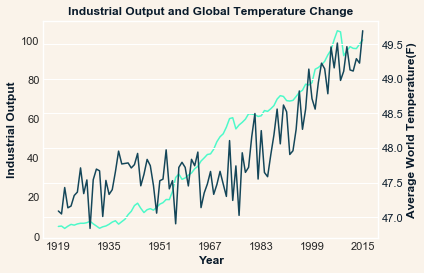

<Figure size 432x288 with 0 Axes>

In [25]:
x = ivtdf['Year']
y1 = ivtdf['Industrial Output']
y2 = ivtdf['Average Temperature (F)']

fig, ax1 = plt.subplots()
ax1.grid(False)
ax2 = ax1.twinx()
ax1.plot(x, y1, '#04FCBC', label='Industrial Output', alpha=0.7)
ax2.plot(x, y2, '#144659', label='Average World Temperature')

ax1.set_xlabel('Year', fontweight='bold', color='#091A2A')
ax1.set_ylabel('Industrial Output', fontweight='bold', color='#091A2A')
ax2.set_ylabel('Average World Temperature(F)', fontweight='bold', color='#091A2A')

plt.xticks(['1919', '1935', '1951', '1967', '1983', '1999', '2015'], color='#091A2A')
plt.yticks(color='#091A2A')
ax1.tick_params(axis='both', which='both', direction= 'in', color='#8C5167', bottom=False, top=False, left=False, right=False)
ax2.tick_params(axis='both', which='both', direction= 'in', color='#8C5167', bottom=False, top=False, left=False, right=False)

plt.title('Industrial Output and Global Temperature Change', fontweight='bold', color='#091A2A')
ax1.set_facecolor('#FAF3EA')
fig.patch.set_facecolor('#FAF3EA')
plt.show()
plt.savefig("visualization1.svg")


([<matplotlib.axis.XTick at 0x1a20881710>,
 <a list of 7 Text xticklabel objects>)

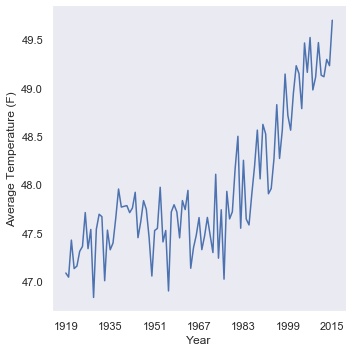

In [27]:
sns.relplot(x='Year', y='Average Temperature (F)', kind='line', data=ivtdf)
sns.set_style("darkgrid", {'axes.grid' : False})
plt.xticks(['1919', '1935', '1951', '1967', '1983', '1999', '2015'])

Workspace for second graph begins here

Text(0, 0.5, 'Average Temperature (F)')

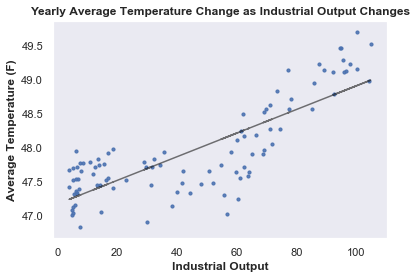

In [28]:
#plt.hlines(world_avg_prev, 0, 10, colors='black', linestyles='dashed', label= 'World Average for Mental Health Disorder Prevalence', alpha=0.4)
io_coef = np.corrcoef(ivtdf['Industrial Output'], ivtdf['Average Temperature (F)'])
x = ivtdf['Industrial Output']
y = ivtdf['Average Temperature (F)']
coef = np.polyfit(x,y,1)
poly1d_fn = np.poly1d(coef) 
plt.plot(x,y, '.', x, poly1d_fn(x), 'k', alpha=0.6)
plt.scatter(ivtdf['Industrial Output'], ivtdf['Average Temperature (F)'], marker ='.', alpha=0.7)
plt.title('Yearly Average Temperature as Yearly Industrial Output Changes', fontweight='bold')
plt.xlabel('Industrial Output', fontweight='bold')
plt.ylabel('Average Temperature (F)', fontweight='bold')
#plt.rcParams["figure.figsize"] = [9,6]
#plt.xlim(2.5,9.5)
#plt.legend(loc='upper left', fontsize='small')
#plt.savefig('Mental Health Disorder Prevalence and Economic Freedom Score with World Average and Regression Line.png', dpi='figure')



In [31]:
io_coef

array([[1.        , 0.81106961],
       [0.81106961, 1.        ]])